Marvel Lekelefac Njunge



ISTA 322 Final Project



Goals of project is to look at dog breeds specifically and find which names are popular with which breed, which breeds are more common, and more popular as well. To look at the most common names for dogs, going in to specifics such as most common names for female dogs and for Male dogs. In the end I want to make a generator for Dog names

In [1]:
#installing needed imports

import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [173]:
!pip install requests
import requests

In [30]:
!pip install mysql-connector-python #
import mysql.connector

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 45.9 MB/s eta 0:00:00


# Inserting Data in csv and API

In [249]:
#will be using this data at a later time with my csv file
api_url = 'https://api.api-ninjas.com/v1/alldogs'  # Remove the name parameter from the URL
response = requests.get(api_url, headers={'X-Api-Key': 'OyTxjHzLag6PjO7LgfIZrg==EFSEe7HWpyYRjkU4'})

if response.status_code == requests.codes.ok:
    data = response.text

else:
    print("Error:", response.status_code, response.text)


Error: 400 {"error": "This endpoint is for premium subscribers only."}


In [63]:
animals = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/seattle_pet_licenses.csv')

###Exploring Animals Data to get a better understanding


In [64]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55961 entries, 0 to 55960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   License Issue Date  55961 non-null  object 
 1   License Number      55932 non-null  float64
 2   Animal's Name       55145 non-null  object 
 3   Species             55961 non-null  object 
 4   Primary Breed       55961 non-null  object 
 5   Secondary Breed     22112 non-null  object 
 6   ZIP Code            55751 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.0+ MB


In [65]:
animals.describe()

,License Number
count,5.593200e+04
mean,2.859112e+05
std,4.362286e+05
min,3.000000e+00
25%,1.193185e+05
50%,1.355365e+05
75%,3.600412e+05
max,7.934732e+07


In [66]:
animals.shape

(55961, 7)

In [67]:
animals.head()


,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,ZIP Code
0,April 19 2003,200097.0,Tinkerdelle,Cat,Domestic Shorthair,NaN,98116
1,February 07 2006,75432.0,Pepper,Cat,Manx,Mix,98103
2,August 31 2012,578859.0,Grey Fox,Cat,Siamese,Mix,98125
3,November 14 2013,832989.0,Hannah,Cat,Domestic Longhair,NaN,98133
4,April 03 2014,433713.0,Daisy,Cat,Domestic Shorthair,NaN,98117


In [68]:
animals.tail()

,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,ZIP Code
55956,March 10 2018,84139.0,Carly Rose,Dog,"Retriever, Labrador",NaN,98117
55957,March 10 2018,112062.0,Cricket,Dog,"Poodle, Miniature","Spaniel, American Cocker",98126
55958,March 10 2018,102232.0,Caledonia,Dog,Bernese Mountain Dog,NaN,98116
55959,March 10 2018,15970.0,Ziggie,Dog,Miniature Pinscher,NaN,98106
55960,March 10 2018,902201.0,Nala,Dog,Kai Ken,NaN,98103


Transforming Data by removing uneccessary collumns and rows

In [70]:
animals


,License Issue Date,License Number,Animal's Name,Species,Primary Breed,Secondary Breed,ZIP Code
0,April 19 2003,200097.0,Tinkerdelle,Cat,Domestic Shorthair,NaN,98116
1,February 07 2006,75432.0,Pepper,Cat,Manx,Mix,98103
2,August 31 2012,578859.0,Grey Fox,Cat,Siamese,Mix,98125
3,November 14 2013,832989.0,Hannah,Cat,Domestic Longhair,NaN,98133
4,April 03 2014,433713.0,Daisy,Cat,Domestic Shorthair,NaN,98117
...,...,...,...,...,...,...,...
55956,March 10 2018,84139.0,Carly Rose,Dog,"Retriever, Labrador",NaN,98117
55957,March 10 2018,112062.0,Cricket,Dog,"Poodle, Miniature","Spaniel, American Cocker",98126
55958,March 10 2018,102232.0,Caledonia,Dog,Bernese Mountain Dog,NaN,98116
55959,March 10 2018,15970.0,Ziggie,Dog,Miniature Pinscher,NaN,98106


In [71]:
#removing license date and license number as it does make the data longer and isn't necessary for my end results
animal = animals.drop(columns=['License Issue Date', 'License Number', 'ZIP Code'])

In [72]:
animal

,Animal's Name,Species,Primary Breed,Secondary Breed
0,Tinkerdelle,Cat,Domestic Shorthair,NaN
1,Pepper,Cat,Manx,Mix
2,Grey Fox,Cat,Siamese,Mix
3,Hannah,Cat,Domestic Longhair,NaN
4,Daisy,Cat,Domestic Shorthair,NaN
...,...,...,...,...
55956,Carly Rose,Dog,"Retriever, Labrador",NaN
55957,Cricket,Dog,"Poodle, Miniature","Spaniel, American Cocker"
55958,Caledonia,Dog,Bernese Mountain Dog,NaN
55959,Ziggie,Dog,Miniature Pinscher,NaN


In [73]:
#removing rows with cats in them in order to have an all dog dataset
dogs = animal[animal['Species'] == 'Dog']
dogs = dogs.reset_index(drop=True)

In [74]:
#change animal name to remove apostrophe
dogs = dogs.rename(columns={"Animal's Name": "Animal_Name"})

In [75]:
dogs

,Animal_Name,Species,Primary Breed,Secondary Breed
0,Winston,Dog,Pug,NaN
1,Charlie,Dog,Pug,NaN
2,Louie,Dog,Boxer,NaN
3,Finn,Dog,Hound,NaN
4,Cole,Dog,Pug,NaN
...,...,...,...,...
36934,Carly Rose,Dog,"Retriever, Labrador",NaN
36935,Cricket,Dog,"Poodle, Miniature","Spaniel, American Cocker"
36936,Caledonia,Dog,Bernese Mountain Dog,NaN
36937,Ziggie,Dog,Miniature Pinscher,NaN


In [76]:
dogs['Species'].unique() #checking to make sure only Dogs are present

array(['Dog'], dtype=object)

In [77]:
#checking NaN values in  columns

nan_counts = dogs.isna().sum()
print(nan_counts)

Animal_Name          113
Species                0
Primary Breed          0
Secondary Breed    20485
dtype: int64


In [78]:
#changing nan value sin animal name to doe for john or jane doe)
dogs.dropna(subset=["Animal_Name"], inplace=True)


In [79]:
#Changing nan values in secondary Breed to unknown
dogs['Secondary Breed'] = dogs['Secondary Breed'].fillna('Unknown')

In [80]:
dogs

,Animal_Name,Species,Primary Breed,Secondary Breed
0,Winston,Dog,Pug,Unknown
1,Charlie,Dog,Pug,Unknown
2,Louie,Dog,Boxer,Unknown
3,Finn,Dog,Hound,Unknown
4,Cole,Dog,Pug,Unknown
...,...,...,...,...
36934,Carly Rose,Dog,"Retriever, Labrador",Unknown
36935,Cricket,Dog,"Poodle, Miniature","Spaniel, American Cocker"
36936,Caledonia,Dog,Bernese Mountain Dog,Unknown
36937,Ziggie,Dog,Miniature Pinscher,Unknown


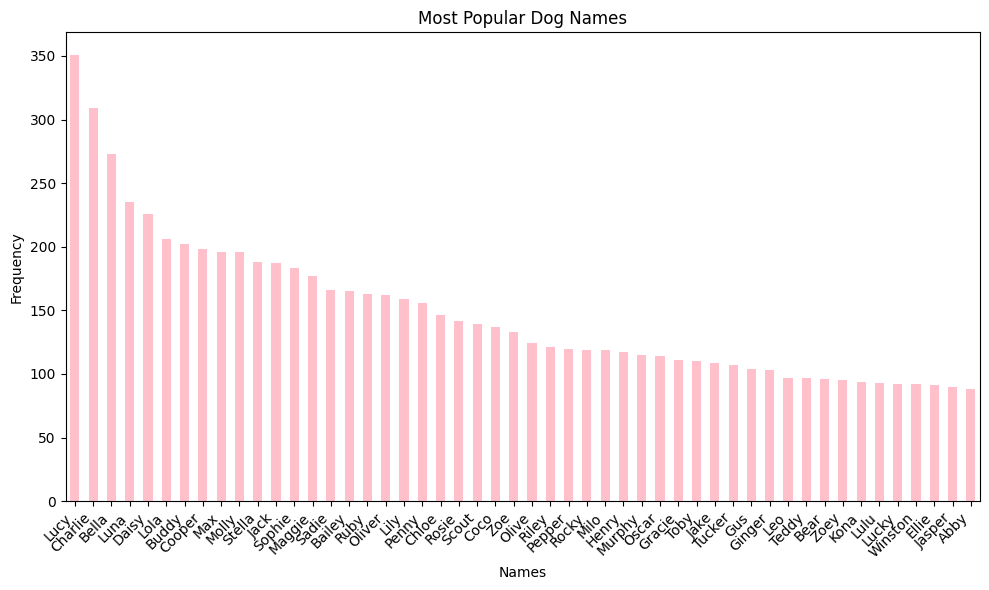

In [110]:
#plotting must popular name of dogs
popular_names = dogs["Animal_Name"].value_counts().head(50)
plt.figure(figsize=(10, 6))
popular_names.plot(kind='bar', color = 'pink')
plt.title('Most Popular Dog Names')
plt.xlabel('Names')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() #making sure it names don't over lap to add more data  plot
plt.show()



In [82]:
dogs["Animal_Name"]

,Animal_Name
0,Winston
1,Charlie
2,Louie
3,Finn
4,Cole
...,...
36934,Carly Rose
36935,Cricket
36936,Caledonia
36937,Ziggie


In [83]:
#separating animal names by gender based guessed.
# I was unsure of how to do this in faster way other
#since most popular girl names began with L I put them as F even if the name is not neccesarly female
#since a lot female name end with a I put them as f as well
dogs['Gender'] = dogs["Animal_Name"].str.endswith('a')
dogs['Gender'] = dogs['Gender'].replace({True: 'F', False: 'M'})

In [84]:
name_l = dogs[dogs["Animal_Name"].str.startswith('L')]
name_l

,Animal_Name,Species,Primary Breed,Secondary Breed,Gender
2,Louie,Dog,Boxer,Unknown,M
19,Link,Dog,"Retriever, Labrador",Unknown,M
22,Lucas,Dog,"Retriever, Labrador",Boxer,M
47,Leo,Dog,Beagle,Unknown,M
73,Leo,Dog,"Retriever, Golden","Retriever, Labrador",M
...,...,...,...,...,...
36897,Lucy,Dog,Boxer,Unknown,M
36907,Lola,Dog,German Shepherd,Unknown,F
36911,Lily,Dog,"Dachshund, Miniature Smooth Haired",Unknown,M
36916,Luna,Dog,"Poodle, Miniature",Unknown,F


In [85]:
#changing female names starting with to be specific onesas well as other names
#as that would make the data fairer and was based on the plot above
dogs.loc[dogs["Animal_Name"].isin(['Lola','Lily', 'Lucy','Daisy','Molly','Sophie','Maggie',
                                     'Sadie','Bailey','Ruby','Penny','Chloe','Rosie','Zoe','Pepper',
                                     'Gracie','Ginger','Zoey','Lulu','Ellie','Abby','Rozy']), 'Gender'] = 'F'

In [86]:
dogs

,Animal_Name,Species,Primary Breed,Secondary Breed,Gender
0,Winston,Dog,Pug,Unknown,M
1,Charlie,Dog,Pug,Unknown,M
2,Louie,Dog,Boxer,Unknown,M
3,Finn,Dog,Hound,Unknown,M
4,Cole,Dog,Pug,Unknown,M
...,...,...,...,...,...
36934,Carly Rose,Dog,"Retriever, Labrador",Unknown,M
36935,Cricket,Dog,"Poodle, Miniature","Spaniel, American Cocker",M
36936,Caledonia,Dog,Bernese Mountain Dog,Unknown,F
36937,Ziggie,Dog,Miniature Pinscher,Unknown,M


In [87]:
#count how many f and m gender to see if data is porpotionate
gender_counts = dogs['Gender'].value_counts()
print(gender_counts)

Gender
M    28856
F     7970
Name: count, dtype: int64


In [88]:
print(dogs["Animal_Name"].head(50))

0          Winston
1          Charlie
2            Louie
3             Finn
4             Cole
5             Moka
6             Bill
7            Moose
8             Hero
9             Boss
10           Buddy
11           Oscar
12         Finigan
13          Cooper
14            Jake
15        Mitchell
16           Pepsi
17       Phinnegan
18           Buddy
19            Link
20           Gizmo
21           Tashi
22           Lucas
23            Bobo
24            Yoji
25           Indie
26           Rusty
27          Barney
28          Arthur
29         Bentley
30         MrBacon
31            Sazi
32           Seuss
33            Tank
34           Banjo
35          Nikita
36    Mr. Truffles
37           Riley
38           Otter
39             Ole
40            Zack
41          Pippin
42          Keegan
43         Stolley
44           Casey
45           Chunk
46          Scotch
47             Leo
48          Murray
49             Rio
Name: Animal_Name, dtype: object


Creating My SQL with two tables based on Gender and the other based on breed

In [131]:
#creating SQL

mysql_address  = 'myista322dbs.cbg00mkm2tlt.us-east-2.rds.amazonaws.com'
mysql_username='admin'
mysql_password='Rdg_Rugg43!'
mysql_database = 'myista322dbs'

def get_conn_cur():
    cnx = mysql.connector.connect(user=mysql_username, password=mysql_password,
          host=mysql_address,
          database=mysql_database, port='3306');
    return (cnx, cnx.cursor())

def run_query(query_string):
  conn, cur = get_conn_cur() # get connection and cursor
  cur.execute(query_string) # executing string as before
  my_data = cur.fetchall() # fetch query data as before
  result_df = pd.DataFrame(my_data, columns=cur.column_names)
  cur.close() # close
  conn.close() # close
  return result_df


def sql_head(table_name):
  conn, cur = get_conn_cur() #get connection and cursor

  #get head information
  table_rows_query = """ SELECT * FROM %s LIMIT 100; """ % table_name
  cur.execute(table_rows_query)
  my_data = cur.fetchall() # fetch results

  # Create a dataframe that combines sql table with column names and return
  df = pd.DataFrame(my_data, columns=cur.column_names)

  cur.close()
  conn.close()
  return df

Gender Table

In [127]:
gender_df = dogs[["Animal_Name", 'Gender', 'Species']]

In [128]:
print(gender_df)

      Animal_Name Gender Species
0         Winston      M     Dog
1         Charlie      M     Dog
2           Louie      M     Dog
3            Finn      M     Dog
4            Cole      M     Dog
...           ...    ...     ...
36934  Carly Rose      M     Dog
36935     Cricket      M     Dog
36936   Caledonia      F     Dog
36937      Ziggie      M     Dog
36938        Nala      F     Dog

[36826 rows x 3 columns]


In [129]:
tq =""" CREATE TABLE Genderdb (
    Species_ID INT AUTO_INCREMENT PRIMARY KEY,
    Animal_Name VARCHAR(255) NOT NULL,
    Gender VARCHAR(255) NOT NULL,
    Species VARCHAR(255) NOT NULL
);"""

conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()

ProgrammingError: 1050 (42S01): Table 'Genderdb' already exists

In [132]:
sql_head(table_name = 'Genderdb')

,Species_ID,Animal_Name,Gender,Species
0,1,Winston,M,Dog
1,2,Charlie,M,Dog
2,3,Louie,M,Dog
3,4,Finn,M,Dog
4,5,Cole,M,Dog
...,...,...,...,...
95,96,King,M,Dog
96,97,Stinky,M,Dog
97,98,Okami,M,Dog
98,99,Chui,M,Dog


In [133]:
data_tups = [tuple(x) for x in gender_df.to_numpy()]

In [135]:
iq = """INSERT INTO Genderdb (Animal_name,Gender,Species )
VALUES (%s, %s, %s)"""

conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()

In [145]:
sql_head(table_name = 'Genderdb')

,Species_ID,Animal_Name,Gender,Species
0,1,Winston,M,Dog
1,2,Charlie,M,Dog
2,3,Louie,M,Dog
3,4,Finn,M,Dog
4,5,Cole,M,Dog
...,...,...,...,...
95,96,King,M,Dog
96,97,Stinky,M,Dog
97,98,Okami,M,Dog
98,99,Chui,M,Dog


In [156]:
#check counts of female and male dogs

run_query("SELECT Gender, COUNT(*) AS Count  FROM Genderdb GROUP BY Gender ;")

,Gender,Count
0,M,86568
1,F,23910


Resuls show that there are 86568 male genders and 23910 female genders present

Breed Table

In [136]:
breed_df = dogs[["Animal_Name", 'Primary Breed', 'Species']]

In [137]:
print(breed_df)

      Animal_Name         Primary Breed Species
0         Winston                   Pug     Dog
1         Charlie                   Pug     Dog
2           Louie                 Boxer     Dog
3            Finn                 Hound     Dog
4            Cole                   Pug     Dog
...           ...                   ...     ...
36934  Carly Rose   Retriever, Labrador     Dog
36935     Cricket     Poodle, Miniature     Dog
36936   Caledonia  Bernese Mountain Dog     Dog
36937      Ziggie    Miniature Pinscher     Dog
36938        Nala               Kai Ken     Dog

[36826 rows x 3 columns]


In [139]:
tq =""" CREATE TABLE breeddb (
    Species_ID INT AUTO_INCREMENT PRIMARY KEY,
    Animal_Name VARCHAR(255) NOT NULL,
    `Primary Breed` VARCHAR(255) NOT NULL,
    Species VARCHAR(255) NOT NULL
);"""

conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()

In [140]:
sql_head(table_name = 'breeddb')

,Species_ID,Animal_Name,Primary Breed,Species


In [141]:
data_tups = [tuple(x) for x in breed_df.to_numpy()]

In [144]:
iq = """INSERT INTO breeddb (Animal_name,`Primary Breed`,Species )
VALUES (%s, %s, %s)"""

conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()

In [146]:
sql_head(table_name = 'breeddb')

,Species_ID,Animal_Name,Primary Breed,Species
0,1,Winston,Pug,Dog
1,2,Charlie,Pug,Dog
2,3,Louie,Boxer,Dog
3,4,Finn,Hound,Dog
4,5,Cole,Pug,Dog
...,...,...,...,...
95,96,King,"Terrier, American Pit Bull",Dog
96,97,Stinky,"Chihuahua, Short Coat",Dog
97,98,Okami,"Retriever, Labrador",Dog
98,99,Chui,"Chihuahua, Short Coat",Dog


In [164]:
run_query("SELECT `Primary Breed`, COUNT(*) AS Breed_count  FROM breeddb GROUP BY `Primary Breed` ;")

,Primary Breed,Breed_count
0,Pug,616
1,Boxer,532
2,Hound,196
3,Kuvasz,6
4,Mix,555
...,...,...
272,Braque Francais Pyrenees,3
273,"Spaniel, Boykin",1
274,Tahitian Bear Dog,1
275,Podenco Gallego,1


In [421]:
#most popular breed
popular_breeds = """
 SELECT `Primary Breed`, COUNT(*) AS Top_Breed
FROM breeddb
GROUP BY `Primary Breed`
ORDER BY Top_Breed DESC
LIMIT 5;
 """

run_query(popular_breeds)

,Primary Breed,Top_Breed
0,"Retriever, Labrador",5281
1,"Retriever, Golden",1967
2,"Chihuahua, Short Coat",1952
3,German Shepherd,1060
4,Terrier,1003


Results show that top breeds are the Labrador Retriever, Golden Retriever, Chihuahua Short coat,German Shepherd, and Terrier



In [166]:
#which genders are in the top 5 breeds
top_breed_gender = """
SELECT b.`Primary Breed`, g.Gender, COUNT(*) AS top_gender_breeds
FROM breeddb b
JOIN Genderdb g ON b.Animal_Name = g.Animal_Name
WHERE b.`Primary Breed` IN (SELECT `Primary Breed` FROM breeddb GROUP BY `Primary Breed` ORDER BY COUNT(*) DESC)
GROUP BY b.`Primary Breed`, g.Gender
ORDER BY top_gender_breeds DESC;
"""

run_query(top_breed_gender)

,Primary Breed,Gender,top_gender_breeds
0,"Retriever, Labrador",M,452343
1,"Retriever, Labrador",F,410424
2,"Retriever, Golden",F,174600
3,"Retriever, Golden",M,167490
4,"Chihuahua, Short Coat",M,141534
...,...,...,...
486,Stabyhoun,M,3
487,Swedish Vallhund,M,3
488,"Terrier, Glen of Imaal",F,3
489,"Terrier, Parson Russell",F,3


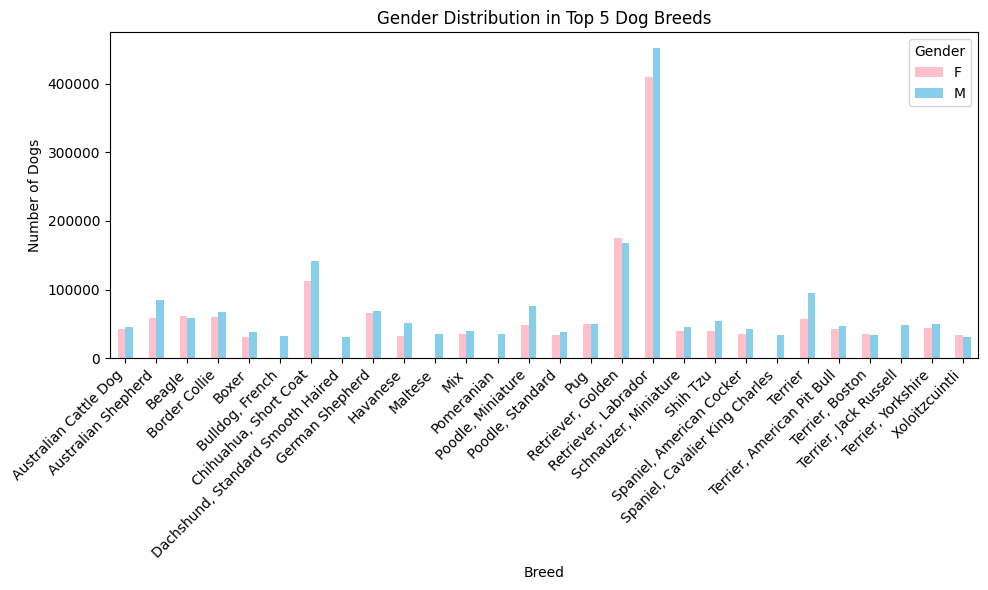

In [424]:
top_breed_gender = run_query("""
SELECT b.`Primary Breed`, g.Gender, COUNT(*) AS top_gender_breeds
FROM breeddb b
JOIN Genderdb g ON b.Animal_Name = g.Animal_Name
WHERE b.`Primary Breed` IN (SELECT `Primary Breed` FROM breeddb GROUP BY `Primary Breed` ORDER BY COUNT(*) DESC)
GROUP BY b.`Primary Breed`, g.Gender
ORDER BY top_gender_breeds DESC
limit 50;
""")


# Reshape the data for plotting
plot_data = top_breed_gender.pivot(index='Primary Breed', columns='Gender', values='top_gender_breeds')

# Create the grouped bar chart
plot_data.plot(kind='bar', figsize=(10, 6), color=['pink', 'skyblue'])
plt.title('Gender Distribution in Top 5 Dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Number of Dogs')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [349]:
run_query("""
SELECT b.`Primary Breed`, b.Animal_Name, g.Gender, COUNT(*) AS NameCount
FROM breeddb b
JOIN Genderdb g ON b.Animal_Name = g.Animal_Name
WHERE b.`Primary Breed` IN (
    SELECT `Primary Breed`
    FROM breeddb
    GROUP BY `Primary Breed`
    ORDER BY COUNT(*) DESC
)
GROUP BY b.`Primary Breed`, b.Animal_Name, g.Gender
ORDER BY NameCount DESC;
""")
#results show charlie and lucy are most common female and male name for the top 5 breeds

,Primary Breed,Animal_Name,Gender,NameCount
0,"Retriever, Labrador",Lucy,F,65286
1,"Retriever, Labrador",Charlie,M,52839
2,"Retriever, Labrador",Bella,F,38493
3,"Retriever, Labrador",Luna,F,33135
4,"Retriever, Golden",Lucy,F,25272
...,...,...,...,...
27819,"Retriever, Labrador",Mokka,F,3
27820,"Retriever, Labrador",Molly Crocchi,M,3
27821,"Retriever, Labrador",Molly Jane,M,3
27822,"Retriever, Labrador",MonaBell,M,3


Table shows dog breeds separated by gender and count of each based on the highest to the lowest

# Joining API and CSV to show breed relation to shedding, trainability, and more

In [221]:
api_url = 'https://api.api-ninjas.com/v1/dogs?name=labrador'  # Remove the name parameter from the URL
response = requests.get(api_url, headers={'X-Api-Key': 'OyTxjHzLag6PjO7LgfIZrg==EFSEe7HWpyYRjkU4'})

if response.status_code == requests.codes.ok:
    data_1 = response.text

else:
    print("Error:", response.status_code, response.text)

print(data_1)

[{"image_link": "https://api-ninjas.com/images/dogs/labrador_retriever.jpg", "good_with_children": 5, "good_with_other_dogs": 5, "shedding": 4, "grooming": 2, "drooling": 2, "coat_length": 1, "good_with_strangers": 5, "playfulness": 5, "protectiveness": 3, "trainability": 5, "energy": 5, "barking": 3, "min_life_expectancy": 10.0, "max_life_expectancy": 12.0, "max_height_male": 24.5, "max_height_female": 24.5, "max_weight_male": 80.0, "max_weight_female": 70.0, "min_height_male": 22.5, "min_height_female": 22.5, "min_weight_male": 65.0, "min_weight_female": 55.0, "name": "Labrador Retriever"}]


In [210]:
api_url = 'https://api.api-ninjas.com/v1/dogs?name=golden'  # Remove the name parameter from the URL
response = requests.get(api_url, headers={'X-Api-Key': 'OyTxjHzLag6PjO7LgfIZrg==EFSEe7HWpyYRjkU4'})

if response.status_code == requests.codes.ok:
    data_2 = response.text

else:
    print("Error:", response.status_code, response.text)

print(data_2)

[{"image_link": "https://api-ninjas.com/images/dogs/golden_retriever.jpg", "good_with_children": 5, "good_with_other_dogs": 5, "shedding": 4, "grooming": 2, "drooling": 2, "coat_length": 1, "good_with_strangers": 5, "playfulness": 4, "protectiveness": 3, "trainability": 5, "energy": 3, "barking": 1, "min_life_expectancy": 10.0, "max_life_expectancy": 12.0, "max_height_male": 24.0, "max_height_female": 24.0, "max_weight_male": 75.0, "max_weight_female": 65.0, "min_height_male": 23.0, "min_height_female": 23.0, "min_weight_male": 65.0, "min_weight_female": 55.0, "name": "Golden Retriever"}]


In [211]:
api_url = 'https://api.api-ninjas.com/v1/dogs?name=chihuahua'  # Remove the name parameter from the URL
response = requests.get(api_url, headers={'X-Api-Key': 'OyTxjHzLag6PjO7LgfIZrg==EFSEe7HWpyYRjkU4'})

if response.status_code == requests.codes.ok:
    data_3 = response.text

else:
    print("Error:", response.status_code, response.text)

print(data_3)

[{"image_link": "https://api-ninjas.com/images/dogs/chihuahua.jpg", "good_with_children": 1, "good_with_other_dogs": 3, "shedding": 2, "grooming": 1, "drooling": 1, "coat_length": 2, "good_with_strangers": 2, "playfulness": 4, "protectiveness": 4, "trainability": 3, "energy": 4, "barking": 5, "min_life_expectancy": 14.0, "max_life_expectancy": 16.0, "max_height_male": 8.0, "max_height_female": 8.0, "max_weight_male": 6.0, "max_weight_female": 6.0, "min_height_male": 5.0, "min_height_female": 5.0, "min_weight_male": 4.0, "min_weight_female": 4.0, "name": "Chihuahua"}]


In [219]:
api_url = 'https://api.api-ninjas.com/v1/dogs?'  # Remove the name parameter from the URL
headers={'X-Api-Key': 'OyTxjHzLag6PjO7LgfIZrg==EFSEe7HWpyYRjkU4'}
params = {'name': 'German Shepherd'}
response = requests.get(api_url, headers=headers, params=params)

if response.status_code == requests.codes.ok:
    data_4 = response.json()

else:
    print("Error:", response.status_code, response.text)

print(data_4)

[{'image_link': 'https://api-ninjas.com/images/dogs/german_shepherd_dog.jpg', 'good_with_children': 5, 'good_with_other_dogs': 3, 'shedding': 4, 'grooming': 2, 'drooling': 2, 'coat_length': 1, 'good_with_strangers': 3, 'playfulness': 4, 'protectiveness': 5, 'trainability': 5, 'energy': 5, 'barking': 3, 'min_life_expectancy': 7.0, 'max_life_expectancy': 10.0, 'max_height_male': 26.0, 'max_height_female': 26.0, 'max_weight_male': 90.0, 'max_weight_female': 70.0, 'min_height_male': 24.0, 'min_height_female': 24.0, 'min_weight_male': 65.0, 'min_weight_female': 50.0, 'name': 'German Shepherd Dog'}]


In [216]:
api_url = 'https://api.api-ninjas.com/v1/dogs?name=terrier'  # Remove the name parameter from the URL
response = requests.get(api_url, headers={'X-Api-Key': 'OyTxjHzLag6PjO7LgfIZrg==EFSEe7HWpyYRjkU4'})

if response.status_code == requests.codes.ok:
    data_5 = response.text

else:
    print("Error:", response.status_code, response.text)

print(data_5)

[{"image_link": "https://api-ninjas.com/images/dogs/airedale_terrier.jpg", "good_with_children": 3, "good_with_other_dogs": 3, "shedding": 1, "grooming": 3, "drooling": 1, "coat_length": 2, "good_with_strangers": 3, "playfulness": 3, "protectiveness": 5, "trainability": 3, "energy": 3, "barking": 3, "min_life_expectancy": 11.0, "max_life_expectancy": 14.0, "max_height_male": 23.0, "max_height_female": 23.0, "max_weight_male": 70.0, "max_weight_female": 70.0, "min_height_male": 23.0, "min_height_female": 23.0, "min_weight_male": 50.0, "min_weight_female": 50.0, "name": "Airedale Terrier"}, {"image_link": "https://api-ninjas.com/images/dogs/american_hairless_terrier.jpg", "good_with_children": 5, "good_with_other_dogs": 3, "shedding": 1, "grooming": 1, "drooling": 1, "coat_length": 1, "good_with_strangers": 3, "playfulness": 3, "protectiveness": 3, "trainability": 5, "energy": 3, "barking": 3, "min_life_expectancy": 14.0, "max_life_expectancy": 16.0, "max_height_male": 16.0, "max_height_

In [324]:
# doing multiple api calls to make a dataframe with 5 top breeds
data_1 = [{"image_link": "https://api-ninjas.com/images/dogs/labrador_retriever.jpg", "good_with_children": 5, "good_with_other_dogs": 5, "shedding": 4, "grooming": 2, "drooling": 2, "coat_length": 1, "good_with_strangers": 5, "playfulness": 5, "protectiveness": 3, "trainability": 5, "energy": 5, "barking": 3, "min_life_expectancy": 10.0, "max_life_expectancy": 12.0, "max_height_male": 24.5, "max_height_female": 24.5, "max_weight_male": 80.0, "max_weight_female": 70.0, "min_height_male": 22.5, "min_height_female": 22.5, "min_weight_male": 65.0, "min_weight_female": 55.0, "name": "Labrador Retriever"}]
data_2 = [{"image_link": "https://api-ninjas.com/images/dogs/golden_retriever.jpg", "good_with_children": 5, "good_with_other_dogs": 5, "shedding": 4, "grooming": 2, "drooling": 2, "coat_length": 1, "good_with_strangers": 5, "playfulness": 4, "protectiveness": 3, "trainability": 5, "energy": 3, "barking": 1, "min_life_expectancy": 10.0, "max_life_expectancy": 12.0, "max_height_male": 24.0, "max_height_female": 24.0, "max_weight_male": 75.0, "max_weight_female": 65.0, "min_height_male": 23.0, "min_height_female": 23.0, "min_weight_male": 65.0, "min_weight_female": 55.0, "name": "Golden Retriever"}]
data_3 = [{"image_link": "https://api-ninjas.com/images/dogs/chihuahua.jpg", "good_with_children": 1, "good_with_other_dogs": 3, "shedding": 2, "grooming": 1, "drooling": 1, "coat_length": 2, "good_with_strangers": 2, "playfulness": 4, "protectiveness": 4, "trainability": 3, "energy": 4, "barking": 5, "min_life_expectancy": 14.0, "max_life_expectancy": 16.0, "max_height_male": 8.0, "max_height_female": 8.0, "max_weight_male": 6.0, "max_weight_female": 6.0, "min_height_male": 5.0, "min_height_female": 5.0, "min_weight_male": 4.0, "min_weight_female": 4.0, "name": "Chihuahua"}]
data_4 = [{'image_link': 'https://api-ninjas.com/images/dogs/german_shepherd_dog.jpg', 'good_with_children': 5, 'good_with_other_dogs': 3, 'shedding': 4, 'grooming': 2, 'drooling': 2, 'coat_length': 1, 'good_with_strangers': 3, 'playfulness': 4, 'protectiveness': 5, 'trainability': 5, 'energy': 5, 'barking': 3, 'min_life_expectancy': 7.0, 'max_life_expectancy': 10.0, 'max_height_male': 26.0, 'max_height_female': 26.0, 'max_weight_male': 90.0, 'max_weight_female': 70.0, 'min_height_male': 24.0, 'min_height_female': 24.0, 'min_weight_male': 65.0, 'min_weight_female': 50.0, 'name': 'German Shepherd Dog'}]
data_5 =[{"image_link": "https://api-ninjas.com/images/dogs/manchester_terrier_(standard).jpg", "good_with_children": 4, "good_with_other_dogs": 3, "shedding": 2, "grooming": 2, "drooling": 1, "coat_length": 1, "good_with_strangers": 3, "playfulness": 4, "protectiveness": 4, "trainability": 4, "energy": 4, "barking": 4, "min_life_expectancy": 15.0, "max_life_expectancy": 17.0, "max_height_male": 16.0, "max_height_female": 16.0, "max_weight_male": 22.0, "max_weight_female": 22.0, "min_height_male": 15.0, "min_height_female": 15.0, "min_weight_male": 12.0, "min_weight_female": 12.0, "name": "Manchester Terrier (Standard)"}]
#using produced dataf from the api

# Create DataFrame

data_1= pd.DataFrame(data_1)
data_2= pd.DataFrame(data_2)
data_3 = pd.DataFrame(data_3)
data_4 = pd.DataFrame(data_4)
data_5 = pd.DataFrame(data_5)
traits_df = pd.concat([data_1, data_2, data_3,data_4,data_5], ignore_index=True)
traits_df

,image_link,good_with_children,good_with_other_dogs,shedding,grooming,drooling,coat_length,good_with_strangers,playfulness,protectiveness,...,max_life_expectancy,max_height_male,max_height_female,max_weight_male,max_weight_female,min_height_male,min_height_female,min_weight_male,min_weight_female,name
0,https://api-ninjas.com/images/dogs/labrador_re...,5,5,4,2,2,1,5,5,3,...,12.0,24.5,24.5,80.0,70.0,22.5,22.5,65.0,55.0,Labrador Retriever
1,https://api-ninjas.com/images/dogs/golden_retr...,5,5,4,2,2,1,5,4,3,...,12.0,24.0,24.0,75.0,65.0,23.0,23.0,65.0,55.0,Golden Retriever
2,https://api-ninjas.com/images/dogs/chihuahua.jpg,1,3,2,1,1,2,2,4,4,...,16.0,8.0,8.0,6.0,6.0,5.0,5.0,4.0,4.0,Chihuahua
3,https://api-ninjas.com/images/dogs/german_shep...,5,3,4,2,2,1,3,4,5,...,10.0,26.0,26.0,90.0,70.0,24.0,24.0,65.0,50.0,German Shepherd Dog
4,https://api-ninjas.com/images/dogs/manchester_...,4,3,2,2,1,1,3,4,4,...,17.0,16.0,16.0,22.0,22.0,15.0,15.0,12.0,12.0,Manchester Terrier (Standard)


In [325]:
traits_df.columns

Index(['image_link', 'good_with_children', 'good_with_other_dogs', 'shedding',
       'grooming', 'drooling', 'coat_length', 'good_with_strangers',
       'playfulness', 'protectiveness', 'trainability', 'energy', 'barking',
       'min_life_expectancy', 'max_life_expectancy', 'max_height_male',
       'max_height_female', 'max_weight_male', 'max_weight_female',
       'min_height_male', 'min_height_female', 'min_weight_male',
       'min_weight_female', 'name'],
      dtype='object')

In [326]:
#removing uneeded columns as they aren't neccessarily important to data i need to understand traits in these 5 dogs
traits_df = traits_df.drop(columns=['image_link', 'min_life_expectancy', 'grooming',	'drooling',
                                    'coat_length', 'min_height_male', 'min_height_female', 'min_weight_male',
                                    'min_weight_female', 'max_height_male','max_height_female', 'max_weight_male', 'max_weight_female'])

In [327]:
traits_df

,good_with_children,good_with_other_dogs,shedding,good_with_strangers,playfulness,protectiveness,trainability,energy,barking,max_life_expectancy,name
0,5,5,4,5,5,3,5,5,3,12.0,Labrador Retriever
1,5,5,4,5,4,3,5,3,1,12.0,Golden Retriever
2,1,3,2,2,4,4,3,4,5,16.0,Chihuahua
3,5,3,4,3,4,5,5,5,3,10.0,German Shepherd Dog
4,4,3,2,3,4,4,4,4,4,17.0,Manchester Terrier (Standard)


In [328]:
all_dogs = pd.merge(traits_df,dogs , left_on='name', right_on='Primary Breed', how='left')

# You can drop the redundant 'Breed' column from traits_df if you want:
#dogs = dogs.drop(columns=['Breed'])

all_dogs

,good_with_children,good_with_other_dogs,shedding,good_with_strangers,playfulness,protectiveness,trainability,energy,barking,max_life_expectancy,name,Animal_Name,Species,Primary Breed,Secondary Breed,Gender
0,5,5,4,5,5,3,5,5,3,12.0,Labrador Retriever,NaN,NaN,NaN,NaN,NaN
1,5,5,4,5,4,3,5,3,1,12.0,Golden Retriever,NaN,NaN,NaN,NaN,NaN
2,1,3,2,2,4,4,3,4,5,16.0,Chihuahua,NaN,NaN,NaN,NaN,NaN
3,5,3,4,3,4,5,5,5,3,10.0,German Shepherd Dog,NaN,NaN,NaN,NaN,NaN
4,4,3,2,3,4,4,4,4,4,17.0,Manchester Terrier (Standard),NaN,NaN,NaN,NaN,NaN


In [368]:
#changing nan of animal name based on most comon female and m names and gender based on that as well from above queries
all_dogs['Gender'] = all_dogs['name'].apply(lambda name: 'F' if name == 'Golden Retriever' else 'M')


In [358]:
all_dogs.loc[all_dogs['name'] == 'Golden Retriever', 'Gender'] = all_dogs.loc[all_dogs['name'] == 'Golden Retriever', 'Gender'].fillna('F')


In [369]:
all_dogs

,good_with_children,good_with_other_dogs,shedding,good_with_strangers,playfulness,protectiveness,trainability,energy,barking,max_life_expectancy,name,Animal_Name,Species,Primary Breed,Secondary Breed,Gender
0,5,5,4,5,5,3,5,5,3,12.0,Labrador Retriever,NaN,NaN,NaN,NaN,M
1,5,5,4,5,4,3,5,3,1,12.0,Golden Retriever,NaN,NaN,NaN,NaN,F
2,1,3,2,2,4,4,3,4,5,16.0,Chihuahua,NaN,NaN,NaN,NaN,M
3,5,3,4,3,4,5,5,5,3,10.0,German Shepherd Dog,NaN,NaN,NaN,NaN,M
4,4,3,2,3,4,4,4,4,4,17.0,Manchester Terrier (Standard),NaN,NaN,NaN,NaN,M


In [371]:
for index, row in all_dogs.iterrows():
    if row['Gender'] == 'M':
        all_dogs.loc[index, 'Animal_Name'] = 'Charlie'
    else:
        all_dogs.loc[index, 'Animal_Name'] = 'Lucy'

In [372]:
all_dogs

,good_with_children,good_with_other_dogs,shedding,good_with_strangers,playfulness,protectiveness,trainability,energy,barking,max_life_expectancy,name,Animal_Name,Species,Primary Breed,Secondary Breed,Gender
0,5,5,4,5,5,3,5,5,3,12.0,Labrador Retriever,Charlie,NaN,NaN,NaN,M
1,5,5,4,5,4,3,5,3,1,12.0,Golden Retriever,Lucy,NaN,NaN,NaN,F
2,1,3,2,2,4,4,3,4,5,16.0,Chihuahua,Charlie,NaN,NaN,NaN,M
3,5,3,4,3,4,5,5,5,3,10.0,German Shepherd Dog,Charlie,NaN,NaN,NaN,M
4,4,3,2,3,4,4,4,4,4,17.0,Manchester Terrier (Standard),Charlie,NaN,NaN,NaN,M


In [373]:
all_dogs = all_dogs.drop(columns=['Species','Primary Breed','Secondary Breed'])

In [374]:
#All dogs now shows the top 5 breeds, as well as their traits, and common gender and name for these breeds
all_dogs

,good_with_children,good_with_other_dogs,shedding,good_with_strangers,playfulness,protectiveness,trainability,energy,barking,max_life_expectancy,name,Animal_Name,Gender
0,5,5,4,5,5,3,5,5,3,12.0,Labrador Retriever,Charlie,M
1,5,5,4,5,4,3,5,3,1,12.0,Golden Retriever,Lucy,F
2,1,3,2,2,4,4,3,4,5,16.0,Chihuahua,Charlie,M
3,5,3,4,3,4,5,5,5,3,10.0,German Shepherd Dog,Charlie,M
4,4,3,2,3,4,4,4,4,4,17.0,Manchester Terrier (Standard),Charlie,M


#Generate Dog name with Json file


In [376]:
#will be using a new dataset for this one
file_path = '/content/drive/MyDrive/Colab Notebooks/breed_list.json'
with open(file_path, 'r') as file:
    data = json.load(file)

In [416]:
ddg = pd.DataFrame(data)

In [380]:
ddg

,weight,height,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,image,country_code,description,history
0,"{'imperial': '6 - 13', 'metric': '3 - 6'}","{'imperial': '9 - 11.5', 'metric': '23 - 29'}",1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,"{'id': 'BJa4kxc4X', 'width': 1600, 'height': 1...",NaN,NaN,NaN
1,"{'imperial': '50 - 60', 'metric': '23 - 27'}","{'imperial': '25 - 27', 'metric': '64 - 69'}",2,Afghan Hound,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,"{'id': 'hMyT4CDXR', 'width': 606, 'height': 38...",AG,NaN,NaN
2,"{'imperial': '44 - 66', 'metric': '20 - 30'}","{'imperial': '30', 'metric': '76'}",3,African Hunting Dog,A wild pack animal,NaN,11 years,"Wild, Hardworking, Dutiful",,rkiByec47,"{'id': 'rkiByec47', 'width': 500, 'height': 33...",NaN,NaN,NaN
3,"{'imperial': '40 - 65', 'metric': '18 - 29'}","{'imperial': '21 - 23', 'metric': '53 - 58'}",4,Airedale Terrier,"Badger, otter hunting",Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,"{'id': '1-7cgoZSh', 'width': 645, 'height': 43...",NaN,NaN,NaN
4,"{'imperial': '90 - 120', 'metric': '41 - 54'}","{'imperial': '28 - 34', 'metric': '71 - 86'}",5,Akbash Dog,Sheep guarding,Working,10 - 12 years,"Loyal, Independent, Intelligent, Brave",,26pHT3Qk7,"{'id': '26pHT3Qk7', 'width': 600, 'height': 47...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,"{'imperial': '15 - 19', 'metric': '7 - 9'}","{'imperial': '13 - 16', 'metric': '33 - 41'}",259,Wire Fox Terrier,"Vermin hunting, fox bolting",NaN,13 – 14 years,"Fearless, Friendly, Bold, Keen, Alert, Quick",NaN,SJ6f2g9EQ,"{'id': 'SJ6f2g9EQ', 'width': 1000, 'height': 7...",NaN,NaN,England
168,"{'imperial': '45 - 70', 'metric': '20 - 32'}","{'imperial': '20 - 24', 'metric': '51 - 61'}",260,Wirehaired Pointing Griffon,"Gundog, ""swamp-tromping"", Flushing, pointing, ...",Sporting,12 - 14 years,"Loyal, Gentle, Vigilant, Trainable, Proud",NaN,Bkam2l9Vm,"{'id': 'Bkam2l9Vm', 'width': 2328, 'height': 1...",NaN,NaN,NaN
169,"{'imperial': '45 - 65', 'metric': '20 - 29'}","{'imperial': '21.5 - 25', 'metric': '55 - 64'}",261,Wirehaired Vizsla,NaN,Sporting,12 - 14 years,NaN,NaN,r1I4hl5Em,"{'id': 'r1I4hl5Em', 'width': 1024, 'height': 7...",NaN,NaN,NaN
170,"{'imperial': '9 - 31', 'metric': '4 - 14'}","{'imperial': '10 - 23', 'metric': '25 - 58'}",262,Xoloitzcuintli,NaN,Non-Sporting,12 - 14 years,"Cheerful, Alert, Companionable, Intelligent, P...",NaN,HkNS3gqEm,"{'id': 'HkNS3gqEm', 'width': 1500, 'height': 1...",NaN,NaN,NaN


In [379]:
ddg.columns

Index(['weight', 'height', 'id', 'name', 'bred_for', 'breed_group',
       'life_span', 'temperament', 'origin', 'reference_image_id', 'image',
       'country_code', 'description', 'history'],
      dtype='object')

In [383]:
ddg_df = ddg.drop(columns=['weight', 'height', 'id', 'name','origin', 'reference_image_id', 'image',
       'country_code', 'description', 'history'])

In [387]:
ddg_df.dropna(inplace=True) #took out all nans

In [388]:
ddg_df

,bred_for,breed_group,life_span,temperament
0,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ..."
1,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy"
3,"Badger, otter hunting",Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig..."
4,Sheep guarding,Working,10 - 12 years,"Loyal, Independent, Intelligent, Brave"
5,Hunting bears,Working,10 - 14 years,"Docile, Alert, Responsive, Dignified, Composed..."
...,...,...,...,...
163,Flushing and retrieving birds,Sporting,12 - 15 years,"Stubborn, Friendly, Affectionate, Loyal, Playf..."
164,"Fox, badger, vermin hunting",Terrier,15 - 20 years,"Hardy, Friendly, Alert, Independent, Gay, Acti..."
165,"Coursing, racing",Hound,12 - 15 years,"Friendly, Affectionate, Lively, Gentle, Intell..."
168,"Gundog, ""swamp-tromping"", Flushing, pointing, ...",Sporting,12 - 14 years,"Loyal, Gentle, Vigilant, Trainable, Proud"


In [395]:
#merge dogs to ddg to gen names
names_df = pd.merge(dogs, ddg_df, left_on='Primary Breed', right_on='breed_group', how='left')
names_df

,Animal_Name,Species,Primary Breed,Secondary Breed,Gender,bred_for,breed_group,life_span,temperament
0,Winston,Dog,Pug,Unknown,M,NaN,NaN,NaN,NaN
1,Charlie,Dog,Pug,Unknown,M,NaN,NaN,NaN,NaN
2,Louie,Dog,Boxer,Unknown,M,NaN,NaN,NaN,NaN
3,Finn,Dog,Hound,Unknown,M,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy"
4,Finn,Dog,Hound,Unknown,M,"Fox hunting, scent hound",Hound,8 - 15 years,"Kind, Sweet-Tempered, Loyal, Independent, Inte..."
...,...,...,...,...,...,...,...,...,...
56593,Carly Rose,Dog,"Retriever, Labrador",Unknown,M,NaN,NaN,NaN,NaN
56594,Cricket,Dog,"Poodle, Miniature","Spaniel, American Cocker",M,NaN,NaN,NaN,NaN
56595,Caledonia,Dog,Bernese Mountain Dog,Unknown,F,NaN,NaN,NaN,NaN
56596,Ziggie,Dog,Miniature Pinscher,Unknown,M,NaN,NaN,NaN,NaN


In [396]:
nan_counts = names_df.isna().sum()
print(nan_counts)

Animal_Name            0
Species                0
Primary Breed          0
Secondary Breed        0
Gender                 0
bred_for           35627
breed_group        35627
life_span          35627
temperament        35627
dtype: int64


In [397]:
names_df.columns

Index(['Animal_Name', 'Species', 'Primary Breed', 'Secondary Breed', 'Gender',
       'bred_for', 'breed_group', 'life_span', 'temperament'],
      dtype='object')

In [398]:
#taking out unnecessary columns
names_df = names_df.drop(columns=['Species', 'Primary Breed', 'Secondary Breed', 'Gender'])
names_df

,Animal_Name,bred_for,breed_group,life_span,temperament
0,Winston,NaN,NaN,NaN,NaN
1,Charlie,NaN,NaN,NaN,NaN
2,Louie,NaN,NaN,NaN,NaN
3,Finn,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy"
4,Finn,"Fox hunting, scent hound",Hound,8 - 15 years,"Kind, Sweet-Tempered, Loyal, Independent, Inte..."
...,...,...,...,...,...
56593,Carly Rose,NaN,NaN,NaN,NaN
56594,Cricket,NaN,NaN,NaN,NaN
56595,Caledonia,NaN,NaN,NaN,NaN
56596,Ziggie,NaN,NaN,NaN,NaN


In [399]:
names_df.dropna(inplace=True) #dropping all nans

In [401]:
names_df.isna().sum()

,0
Animal_Name,0
bred_for,0
breed_group,0
life_span,0
temperament,0


In [402]:
#names_df now display a list of breeds with names and traits wit temperament
names_df

,Animal_Name,bred_for,breed_group,life_span,temperament
3,Finn,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy"
4,Finn,"Fox hunting, scent hound",Hound,8 - 15 years,"Kind, Sweet-Tempered, Loyal, Independent, Inte..."
5,Finn,"Livestock guardian, hunting",Hound,10 - 13 years,"Aloof, Affectionate, Attentive, Rugged, Fierce..."
6,Finn,Hunting,Hound,10 - 12 years,"Affectionate, Energetic, Alert, Curious, Playf..."
7,Finn,Hunting on foot.,Hound,10 - 14 years,"Affectionate, Lively, Agile, Curious, Happy, A..."
...,...,...,...,...,...
56510,Lula,"Hunting raccoon, deer, bear, and cougar.",Hound,10 - 12 years,"Affectionate, Energetic, Independent, Companio..."
56511,Lula,"Big game hunting, guarding",Hound,10 - 12 years,"Strong Willed, Mischievous, Loyal, Dignified, ..."
56512,Lula,Coursing gazelle and hare,Hound,12 - 14 years,"Aloof, Reserved, Intelligent, Quiet"
56513,Lula,Coursing deer,Hound,8 - 10 years,"Docile, Friendly, Dignified, Gentle"


In [417]:
#code to generate name based on breed type


!pip install names
import names
import random

def generate_dog_name(breed_group, temperament):
    """Generates a dog name based on breed type and temperament."""

    # Convert Series to tuples for hashability:
    name_styles = dict(zip(names_df['breed_group'].unique(), names_df['temperament'].unique()))
    #name_styles is now dictionary with breed_group as key and temperment as value

    # Choose a name based on breed group and temperament
    name = random.choice(name_styles.get(breed_group, names_df['Animal_Name'].tolist())) if breed_group in name_styles else random.choice(names_df['Animal_Name'].tolist())

    return name

# Get input from the user
breed_group = input("Enter the breed type: ")
temperament = input("Enter the temperament: ")

# Generate the dog name
dog_name = generate_dog_name(breed_group, temperament)

# Print the generated name
print(f"Generated dog name: {dog_name}")

Enter the breed type: Labrador
Enter the temperament: hunting
Generated dog name: Posie
